<a href="https://colab.research.google.com/github/kimhwidam/zerobase_EDA/blob/main/Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zerobase EDA 5일차
## 시계열 데이터 분석

### 한글 깨짐 방지

In [1]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.3 MB/s eta 0:00:00


Text(0.5, 1.0, '데이터 사이언스')

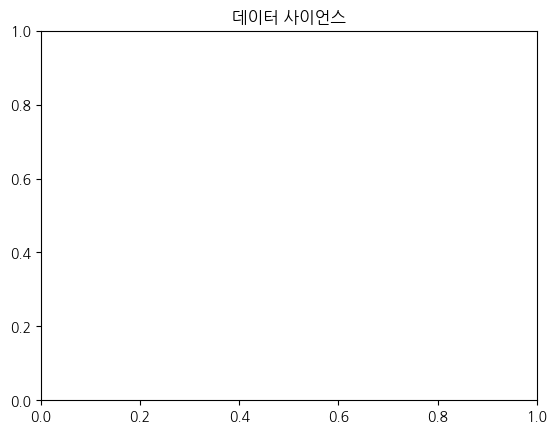

In [2]:
import koreanize_matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.title('데이터 사이언스')

## prophet 설치
- prophet
    - https://facebook.github.io/prophet/
- install
    - 윈도우는 Visual C++ Build Tool을 먼저 설치
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - pip install prophet
    - 기존 영상 강의에서 설명했던 패키지명이 fbprophet에서 prophet으로 최근에 변경됨

In [14]:
!pip install prophet

## prophet 기초

In [18]:
from pandas_datareader import data
from prophet import Prophet
import pandas as pd
import numpy as np

### 예제 1

In [28]:
time = np.linspace(0, 1, 365*2) # 0부터 1까지 365*2개의 숫자를 생성
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2023-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2023-01-01,0.000000
1,2023-01-02,0.103243
2,2023-01-03,0.205382
3,2023-01-04,0.305326
4,2023-01-05,0.402007


<Axes: >

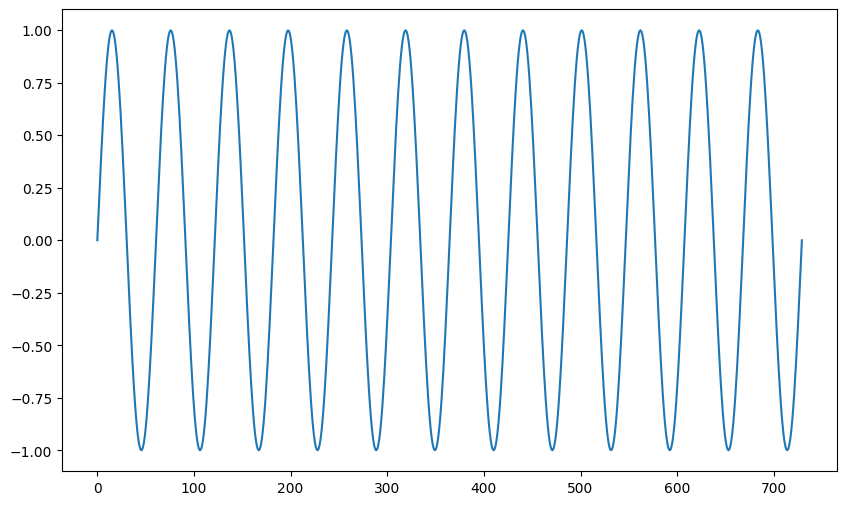

In [29]:
df["y"].plot(figsize=(10, 6))

In [30]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 시계열 데이터 학습

DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/3gmssgyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/tg9gnhtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3051', 'data', 'file=/tmp/tmphebh_xw3/3gmssgyb.json', 'init=/tmp/tmphebh_xw3/tg9gnhtz.json', 'output', 'file=/tmp/tmphebh_xw3/prophet_modelb59scb2x/prophet_model-20240312113928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

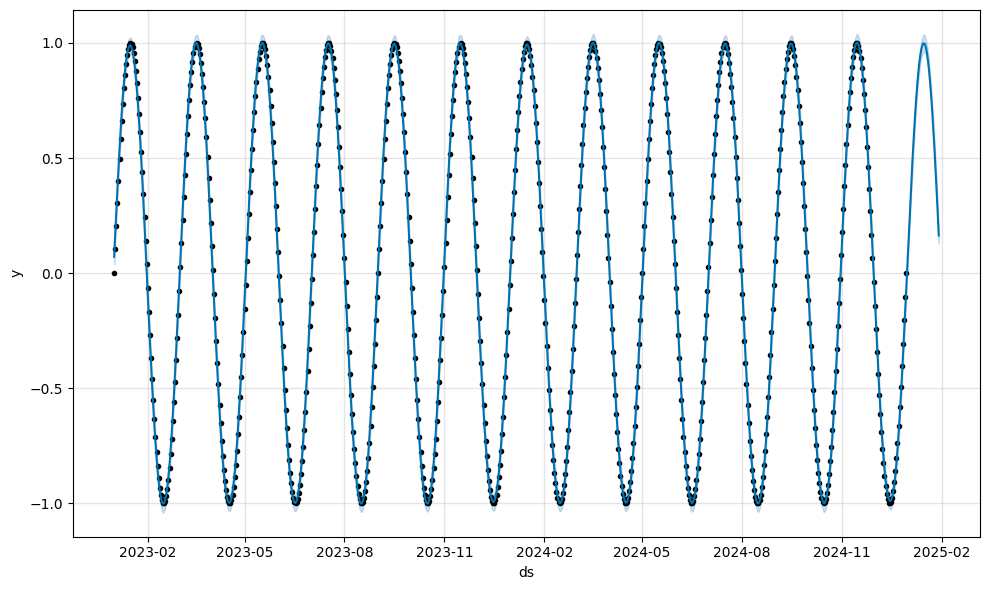

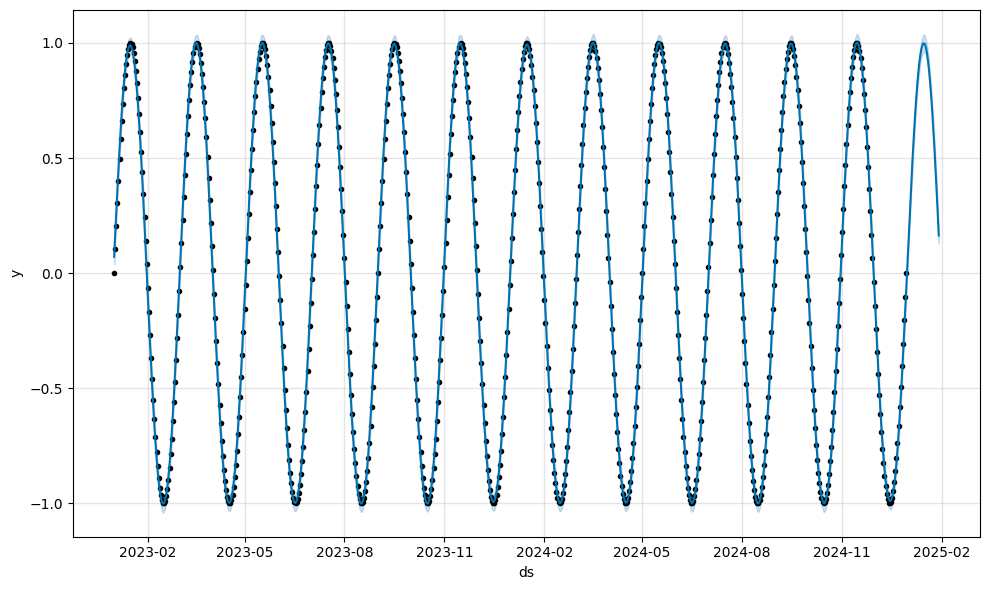

In [32]:
m.plot(forecast)

### 예제 2

<Axes: >

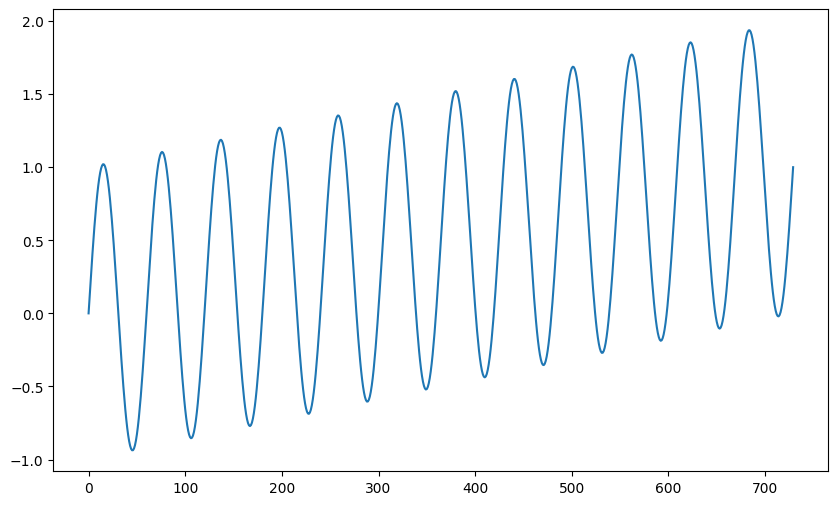

In [33]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time # 가중치가 추가

ds = pd.date_range("2023-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/e754mxsi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/__cfs_55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75630', 'data', 'file=/tmp/tmphebh_xw3/e754mxsi.json', 'init=/tmp/tmphebh_xw3/__cfs_55.json', 'output', 'file=/tmp/tmphebh_xw3/prophet_modelz3uyrym0/prophet_model-20240312114129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


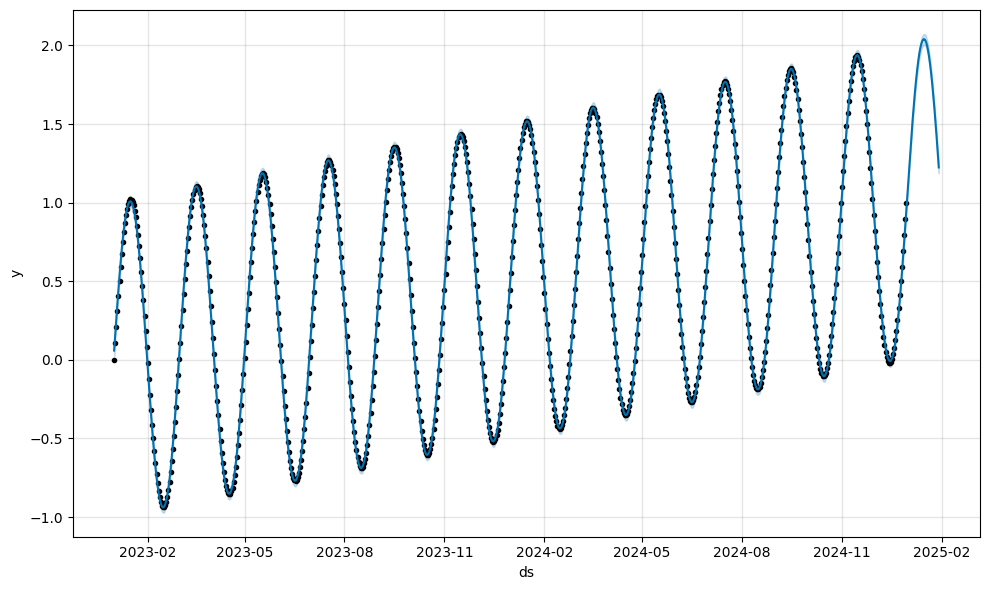

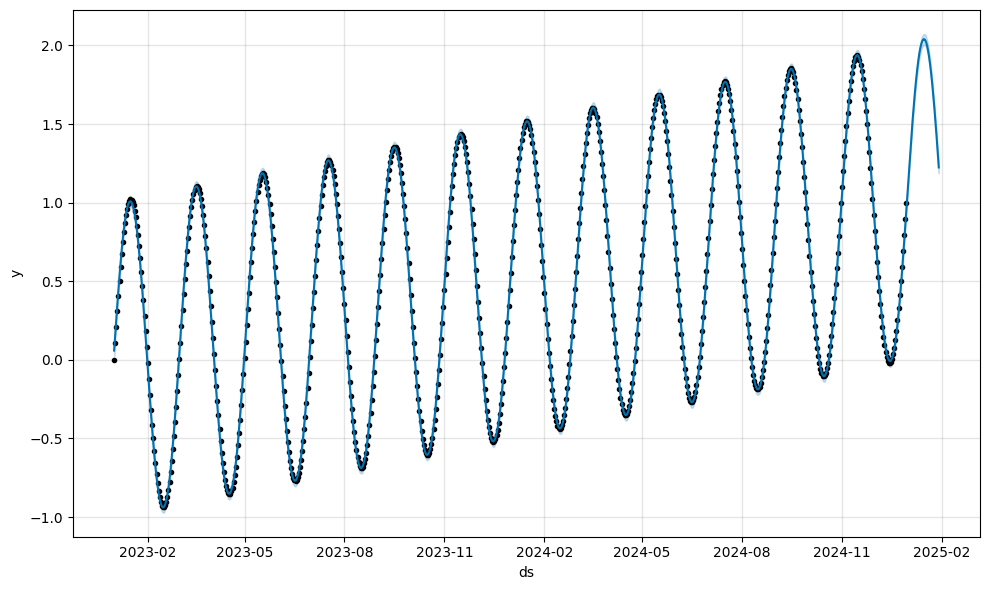

In [34]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 시계열 데이터 학습
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

### 예제 3

<Axes: >

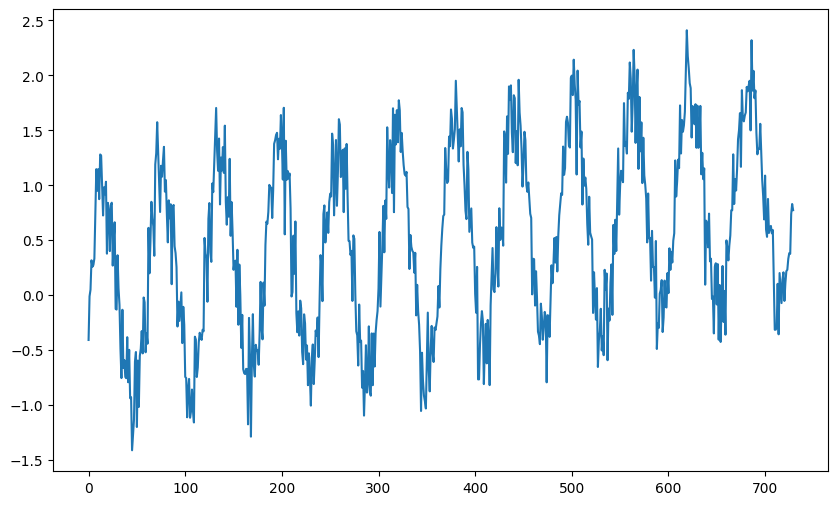

In [35]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4 # 가중치가 더 추가됨

ds = pd.date_range("2023-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})

df["y"].plot(figsize=(10, 6))

DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/9j3fxavj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/3ttz0rbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=776', 'data', 'file=/tmp/tmphebh_xw3/9j3fxavj.json', 'init=/tmp/tmphebh_xw3/3ttz0rbc.json', 'output', 'file=/tmp/tmphebh_xw3/prophet_modelvejko893/prophet_model-20240312114233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:42:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


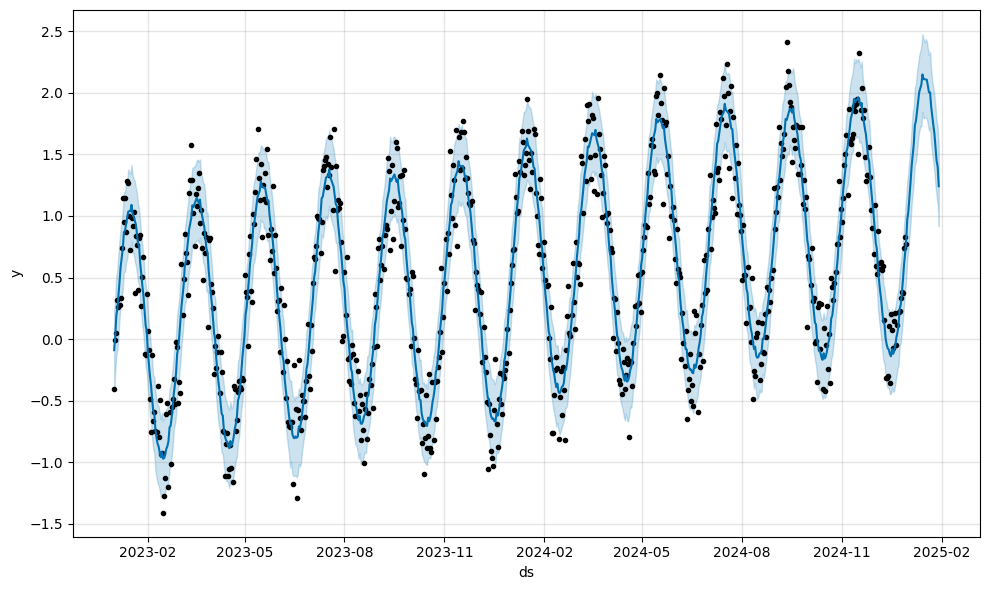

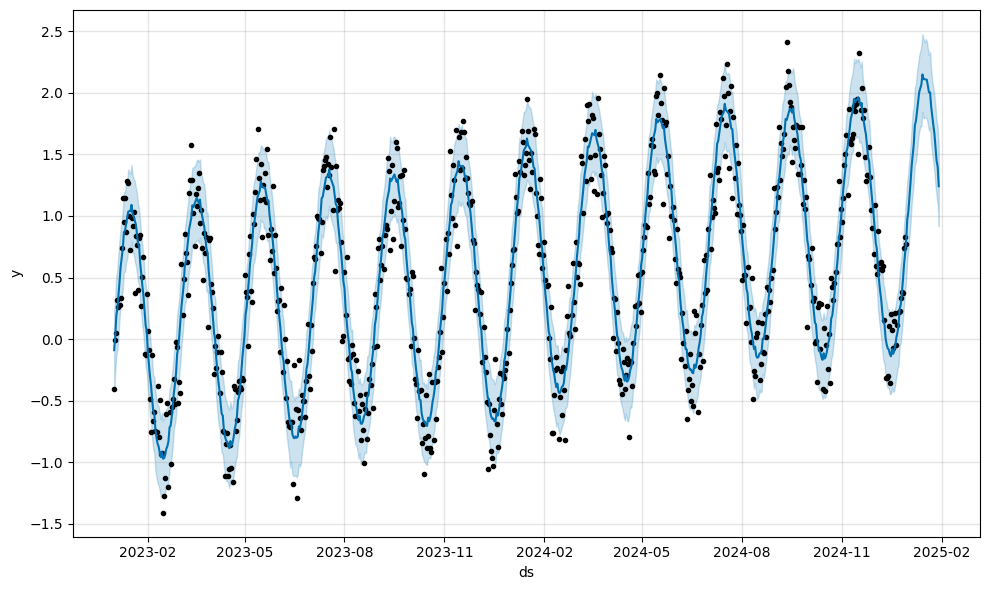

In [36]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 시계열 데이터 학습
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

## 실전 예제(trend 파악) - pinkwink.kr 사이트 유입량 데이터 분석 및 예측

### 데이터 출처
교수님 블로그 - https://pinkwink.kr/

In [37]:
# 영상 강의에서 배포한 2016년부터 2017년까지 블로그 방문객 유입량 데이터 가져오기
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

pinkwink_web = pd.read_csv(
    "/content/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date", "hit"],
    index_col=0
)

pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<Axes: xlabel='date'>

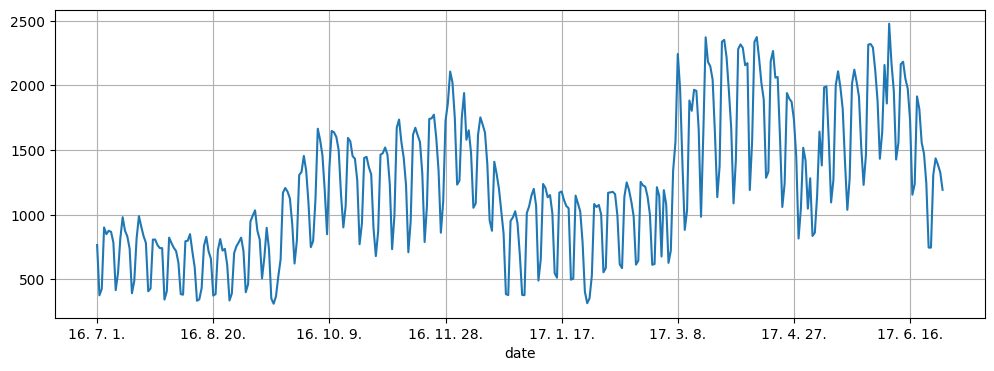

In [38]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

In [39]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

In [41]:
# 실제데이터와 오차값을 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [51]:
# 차수별 계수 생성 -> 1, 2, 3차 함수까지는 에러의 큰 차이가 없음
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [52]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777305877038


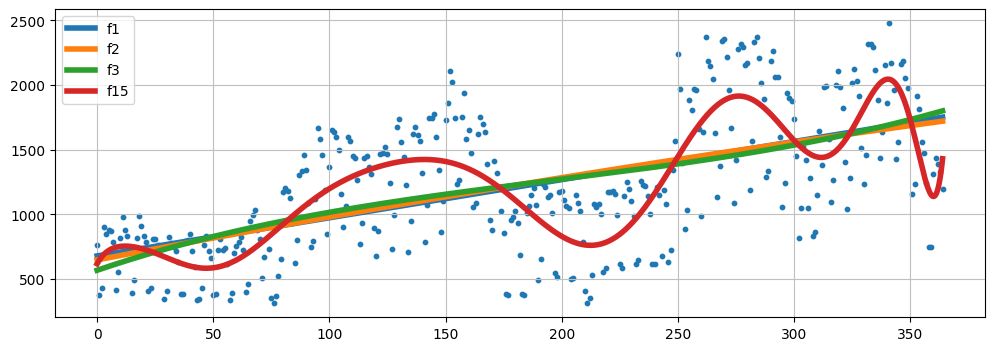

In [53]:
# 시각화
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [54]:
# 이제 prophet 적용
df = pd.DataFrame({"ds": pinkwink_web.index, "y": pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [55]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 학습

DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/l1w4a0g_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphebh_xw3/_znq_8o8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3682', 'data', 'file=/tmp/tmphebh_xw3/l1w4a0g_.json', 'init=/tmp/tmphebh_xw3/_znq_8o8.json', 'output', 'file=/tmp/tmphebh_xw3/prophet_modeljo_if_e5/prophet_model-20240312121131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.head()

,ds
0,2016-07-01
1,2016-07-02
2,2016-07-03
3,2016-07-04
4,2016-07-05


In [57]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-07-01,728.237862,523.348539,934.464363
1,2016-07-02,297.584150,96.236464,516.935204
2,2016-07-03,418.094365,222.898466,636.339729
3,2016-07-04,961.956789,775.299397,1179.662042
4,2016-07-05,991.898794,778.479576,1203.820682


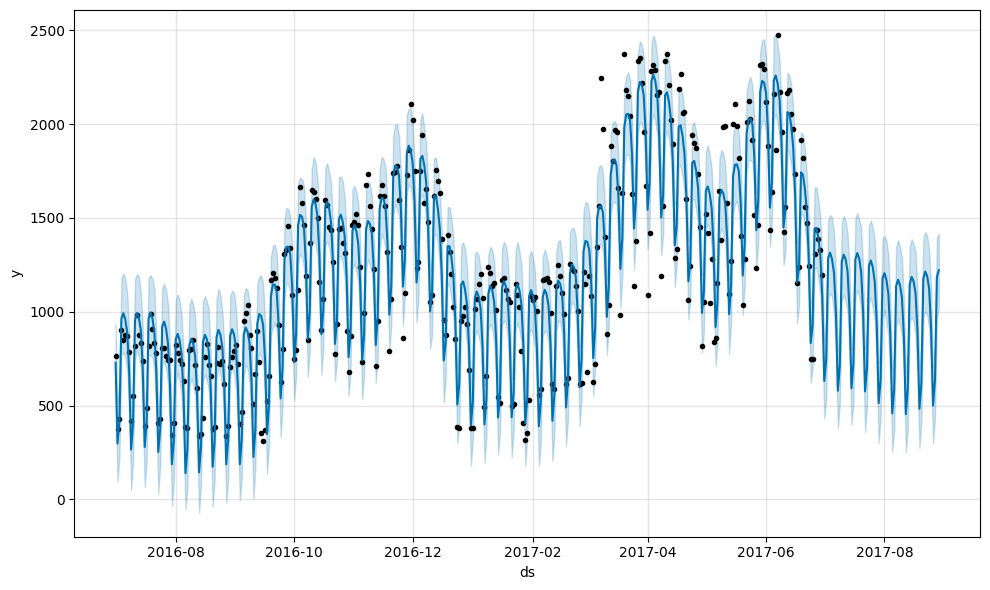

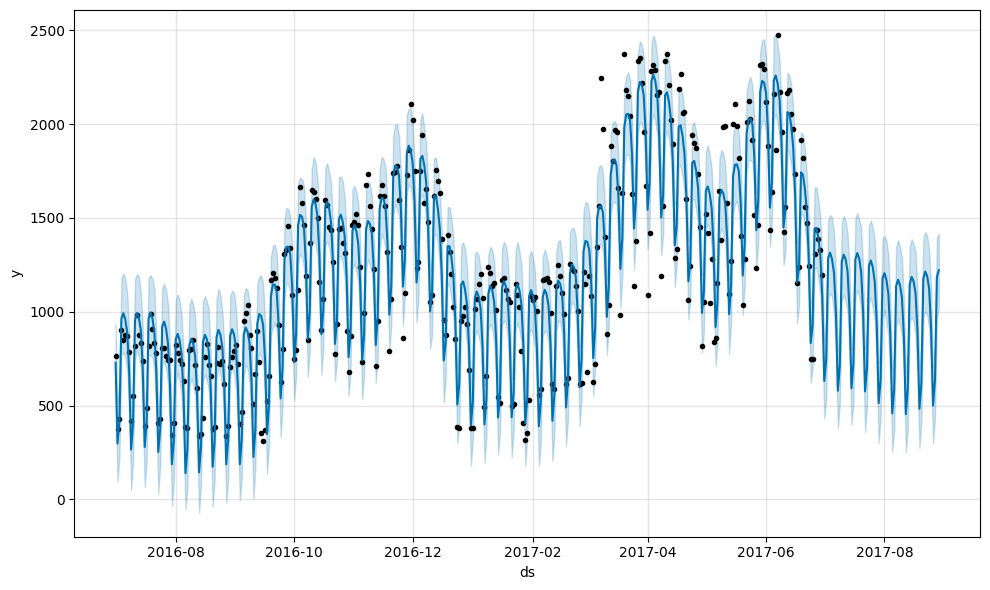

In [58]:
# 시각화
m.plot(forecast)

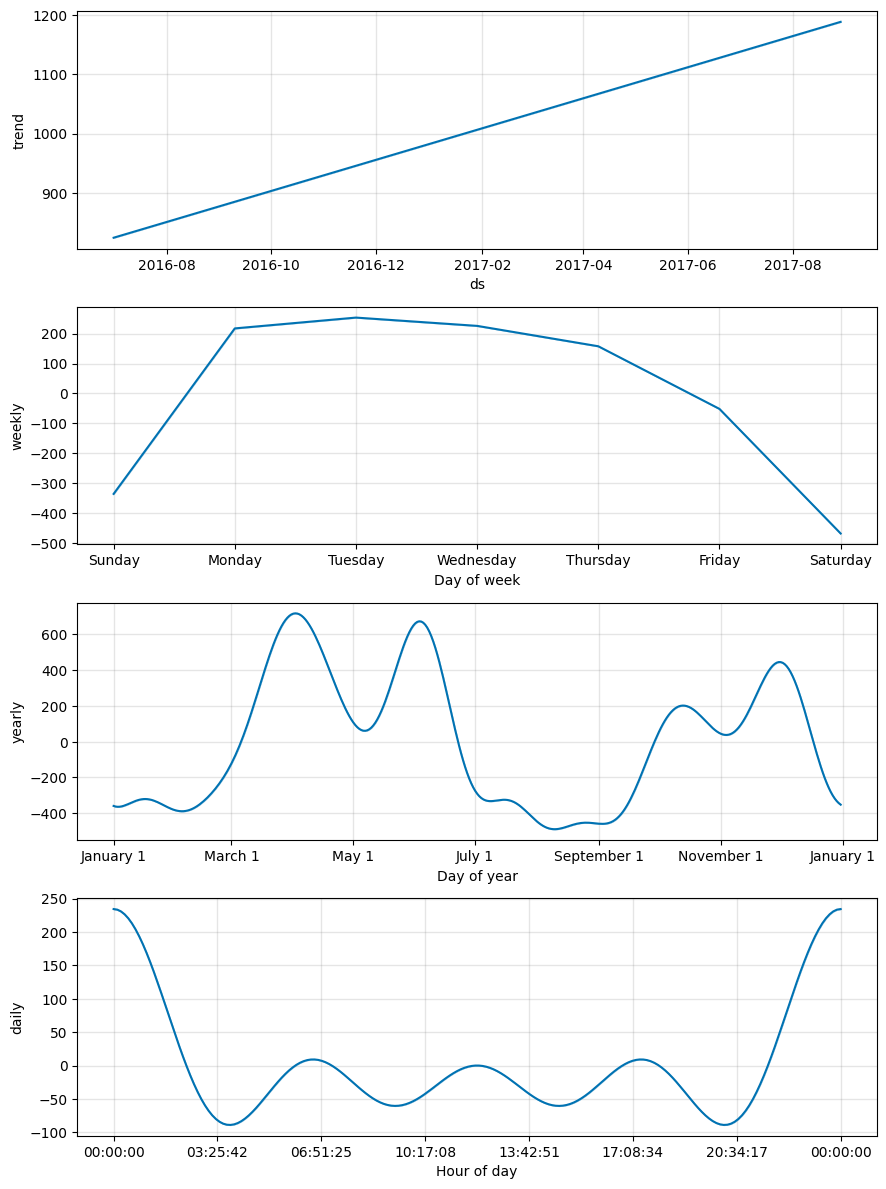

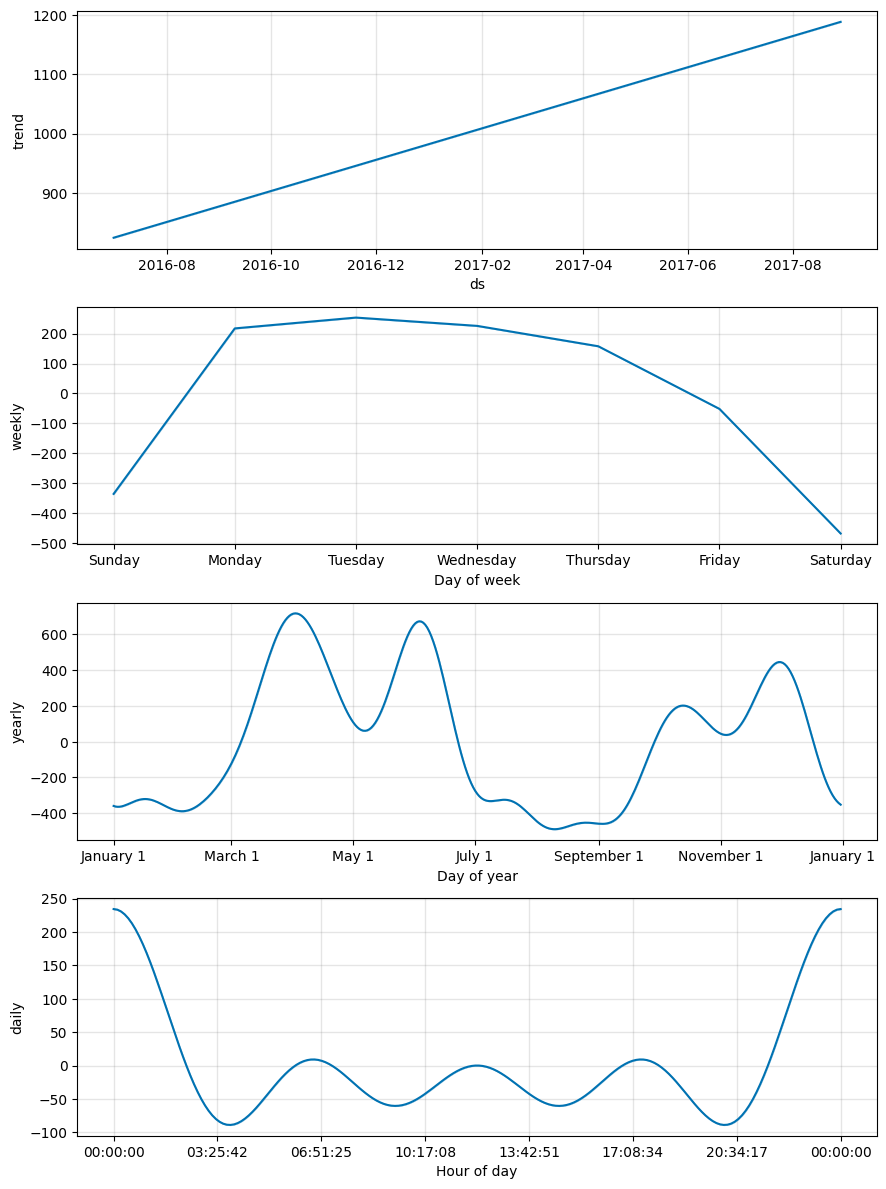

In [59]:
# forecast 결과에 대해 component를 확인할 수 있음(trend 파악)
m.plot_components(forecast)

* 유입자 수는 월, 화, 수가 trend에 비해 많은 것을 알 수 있음
* trend에 비해 3, 4, 10, 12월에 많은 것을 알 수 있음 -> 중간고사, 기말고사에 많이 방문한다는 것을 볼 수 있다고 생각할 수 있음
* 그리고, 비교적 시간으로는 23시~00시에 많음